# NLP LAB Problem 2

## Data Preparation

## 1. Load input symbol sequence

In [4]:
import os
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [5]:
def read_data(data_dir, is_train):
    data, labels = [], []
    
    if is_train:
        file_name = os.path.join(data_dir, 'simple_seq.train.csv')
        with open(os.path.join(file_name), 'rb') as f:
            file = f.read().decode('utf-8').replace('\r', '')
            content = file.split('\n')
            for line in content:
                line = line.strip(',')
                line_list = line.split(',')
                data.append(line_list[:-1])
                labels.append(line_list[-1])
        return data, labels
    else:
        file_name = os.path.join(data_dir, 'simple_seq.test.csv')
        with open(os.path.join(file_name), 'rb') as f:
            file = f.read().decode('utf-8').replace('\r', '')
            content = file.split('\n')
            for line in content:
                line = line.strip(',')
                line_list = line.split(',')
                data.append(line_list)
        return data

In [16]:
data_dir = './lab1-2_data'
# Train Data
train_x_list, train_y_list = read_data(data_dir, True) # train #: 900
train_x_list, train_y_list = train_x_list[:-1], train_y_list[:-1]
train_len = len(train_y_list)
print(len(train_x_list), len(train_y_list))

# Test Data
test_x_list = read_data(data_dir, False) # test #: 100
test_x_list = test_x_list[:-1]
test_len = len(test_x_list)
print(len(test_x_list))

900 900
100


## 2. Replace the dictionary(generated at Lab1-problem 1) into trainable word embedding

In [17]:
import pickle

# lookup table is a dictionary object containing the relationship between words and ids
with open('./word_dict_1.pickle','rb') as f: # word_dict_1: 1076
    word_dict_1 = pickle.load(f)

print(word_dict_1)
print(len(word_dict_1))
len_symbol_sequence = len(word_dict_1)

{'unknown': 0, 'W2554': 1, 'W446': 2, 'W2486': 3, 'W155': 4, 'W930': 5, 'W4462': 6, 'W568': 7, 'W412': 8, 'W809': 9, 'W3852': 10, 'W4706': 11, 'W4665': 12, 'W3167': 13, 'W2832': 14, 'W2068': 15, 'W973': 16, 'W300': 17, 'W5376': 18, 'W801': 19, 'W1061': 20, 'W5118': 21, 'W66': 22, 'W5227': 23, 'W252': 24, 'W170': 25, 'W5381': 26, 'W4495': 27, 'W2232': 28, 'W2329': 29, 'W2055': 30, 'W5389': 31, 'W2929': 32, 'W2189': 33, 'W1365': 34, 'W408': 35, 'W216': 36, 'W1125': 37, 'W1926': 38, 'W3117': 39, 'W53': 40, 'W3968': 41, 'W4789': 42, 'W1586': 43, 'W3384': 44, 'W5330': 45, 'W223': 46, 'W3948': 47, 'W3169': 48, 'W2961': 49, 'W83': 50, 'W1368': 51, 'W5267': 52, 'W1832': 53, 'W5414': 54, 'W844': 55, 'W105': 56, 'W1343': 57, 'W217': 58, 'W3526': 59, 'W1242': 60, 'W3306': 61, 'W641': 62, 'W496': 63, 'W5115': 64, 'W528': 65, 'W3625': 66, 'W654': 67, 'W264': 68, 'W325': 69, 'W4682': 70, 'W1982': 71, 'W2567': 72, 'W2094': 73, 'W219': 74, 'W6': 75, 'W1450': 76, 'W1775': 77, 'W3690': 78, 'W2026': 79, 

In [18]:
# transform all the symbol sequence into one-hot representation
zero_vec = torch.zeros(len_symbol_sequence)
zero_vec[0] = 1
one_hot_dict = {'unknown': zero_vec}

for key, value in word_dict_1.items():
    one_hot_key = torch.zeros(len_symbol_sequence)
    one_hot_key[value] = 1
    one_hot_dict[key] = one_hot_key

print(one_hot_dict)
print(len(one_hot_dict))

{'unknown': tensor([1., 0., 0.,  ..., 0., 0., 0.]), 'W2554': tensor([0., 1., 0.,  ..., 0., 0., 0.]), 'W446': tensor([0., 0., 1.,  ..., 0., 0., 0.]), 'W2486': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W155': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W930': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W4462': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W568': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W412': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W809': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W3852': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W4706': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W4665': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W3167': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W2832': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W2068': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W973': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W300': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W5376': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W801': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'W1061': tensor([0., 0., 0

### set the dimension size of embedding

In [19]:
embedding_num = 1000

In [20]:
# embedding vector - xavier intialization
# look_up_table = nn.init.xavier_uniform_(torch.empty(len(word_dict_1), embedding_num))

# embedding vector - He intialization
look_up_table = nn.init.kaiming_uniform_(torch.empty(len(word_dict_1), embedding_num, requires_grad = True))

print(look_up_table)
print(look_up_table.shape)

tensor([[ 0.0020,  0.0505, -0.0185,  ...,  0.0597, -0.0629,  0.0542],
        [ 0.0294,  0.0275, -0.0711,  ..., -0.0078, -0.0599, -0.0371],
        [ 0.0263, -0.0314, -0.0467,  ...,  0.0257,  0.0114, -0.0454],
        ...,
        [-0.0034,  0.0215,  0.0036,  ..., -0.0246,  0.0444, -0.0004],
        [ 0.0650,  0.0032,  0.0181,  ...,  0.0693, -0.0425, -0.0032],
        [-0.0682,  0.0116, -0.0497,  ...,  0.0640,  0.0643, -0.0635]],
       requires_grad=True)
torch.Size([1076, 1000])


In [21]:
category_dict = {'D1': 0, 'D3': 1, 'D4': 2, 'D5': 3, 'D6': 4, 'D7': 5, 'D11': 6, 'D12': 7, 'D13': 8, 'D15': 9, 'D16': 10,
                 'D17': 11, 'D18': 12, 'D19': 13, 'D20': 14, 'D21': 15, 'D27': 16, 'D28': 17, 'D32': 18}
dict_category = {0: 'D1', 1: 'D3', 2: 'D4', 3: 'D5', 4: 'D6', 5: 'D7', 6: 'D11', 7: 'D12', 8: 'D13', 9: 'D15', 10: 'D16',
                 11: 'D17', 12: 'D18', 13: 'D19', 14: 'D20', 15: 'D21', 16: 'D27', 17: 'D28', 18: 'D32'}

In [22]:
train_y = torch.zeros(train_len, 19) # torch tensor (900, )
for idx, value in enumerate(train_y_list):
    tmp = torch.zeros(19)
    tmp[category_dict[value]] = 1
    train_y[idx] = tmp
print(train_y)
print(train_y.shape)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([900, 19])


## 3. Vectorize symbol sequence & 4. Padding (set different input length being same: add zero vector)

### Transform train input's symbol sequence into one-hot vector tensor

In [23]:
train_x = torch.zeros((train_len, 20, len_symbol_sequence)) # (900, 20, 1076), maximum_length of sequence was given to be 20.
print(train_x.shape)

torch.Size([900, 20, 1076])


In [24]:
def word_to_vec(sequence):
    if len(sequence) > 20:
        sequence = sequence[:20]
    elif len(sequence) < 20:
        tmp = ['unknown'] * (20 - len(sequence))
        sequence.extend(tmp)

    res = torch.zeros((20, len_symbol_sequence))
    
    for i in range(20):
        if sequence[i] in one_hot_dict: # if this word is in the word dictionary,
            res[i] = one_hot_dict[sequence[i]]
        else: # if this word's frequency is 1 so excluded from word dictionary,
            res[i] = one_hot_dict['unknown']
    
    return res

In [25]:
# make final train_x tensor

for idx, sequence in enumerate(train_x_list):
    train_x[idx] = word_to_vec(sequence)

print(train_x)
print(train_x.shape)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0., 

### Make test data's symbol sequence into one-hot vector embedding

In [26]:
test_x = torch.zeros((test_len, 20, len_symbol_sequence)) # (100, 20, 1076)
print(test_x.shape)

torch.Size([100, 20, 1076])


In [27]:
# make final test_x tensor

for idx, sequence in enumerate(test_x_list):
    test_x[idx] = word_to_vec(sequence)

In [28]:
print(test_x)
print(test_x.shape)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0., 

## 5. Design 3-layer feedforward network

In [29]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import math
import torch.optim as optim
import torch.utils.data as data
from sklearn.metrics import average_precision_score

In [30]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("device: ", device)

device:  cuda


In [31]:
# look_up_table.requires_grad = True
print(look_up_table)

tensor([[ 0.0020,  0.0505, -0.0185,  ...,  0.0597, -0.0629,  0.0542],
        [ 0.0294,  0.0275, -0.0711,  ..., -0.0078, -0.0599, -0.0371],
        [ 0.0263, -0.0314, -0.0467,  ...,  0.0257,  0.0114, -0.0454],
        ...,
        [-0.0034,  0.0215,  0.0036,  ..., -0.0246,  0.0444, -0.0004],
        [ 0.0650,  0.0032,  0.0181,  ...,  0.0693, -0.0425, -0.0032],
        [-0.0682,  0.0116, -0.0497,  ...,  0.0640,  0.0643, -0.0635]],
       requires_grad=True)


In [41]:
class MyModel(nn.Module):
    def __init__(self, in_features, num_hid1, num_hid2):
        super(MyModel, self).__init__()
        
        # self.weight_1 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(num_hid1, in_features))) # He initialization
        self.weight_1 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hid1, in_features))) # Xavier initialization
        self.embedding = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(len(word_dict_1), embedding_num))) # He initialization
        self.bias_1 = nn.Parameter(torch.empty(num_hid1))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.embedding)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_1, -bound, bound)

        # self.weight_2 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(num_hid2, num_hid1))) # He initialization
        self.weight_2 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(num_hid2, num_hid1))) # Xavier initialization
        self.bias_2 = nn.Parameter(torch.empty(num_hid2))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight_2)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_2, -bound, bound)

        # self.weight_3 = nn.Parameter(nn.init.kaiming_uniform_(torch.empty(19, num_hid2))) # He initialization
        self.weight_3 = nn.Parameter(nn.init.xavier_uniform_(torch.empty(19, num_hid2))) # Xavier initialization
        self.bias_3 = nn.Parameter(torch.empty(19))
        fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight_3)
        bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
        init.uniform_(self.bias_3, -bound, bound)

        self.bn_1 = nn.BatchNorm1d(num_hid1)
        self.bn_2 = nn.BatchNorm1d(num_hid2)

        self.sigmoid_function = nn.Sigmoid()
    
    def forward(self, inputs):
        # inputs: (batch_size, max_length * 1076)
        input_shape = inputs.shape # (30, 20, 1076)
        input = (torch.mm(inputs.flatten(0, 1), self.embedding).reshape(input_shape[0], input_shape[1], -1)).flatten(1,2)

        out = torch.mm(input, self.weight_1.T) + self.bias_1
        out = self.bn_1(out)
        out = self.sigmoid_function(out)

        out = torch.mm(out, self.weight_2.T) + self.bias_2
        out = self.bn_2(out)
        out = self.sigmoid_function(out)

        out = torch.mm(out, self.weight_3.T) + self.bias_3

        return out

In [42]:
# Define Model
input_size = embedding_num * 20
num_hid1 = 1000
num_hid2 = 100

model = MyModel(input_size, num_hid1, num_hid2).to(device)

In [43]:
print(model.embedding)
print(model.embedding.shape)

Parameter containing:
tensor([[-0.0679,  0.0073,  0.0374,  ..., -0.0324, -0.0043,  0.0141],
        [ 0.0396,  0.0250, -0.0757,  ...,  0.0374, -0.0295,  0.0393],
        [-0.0361,  0.0337, -0.0329,  ...,  0.0011,  0.0569,  0.0378],
        ...,
        [-0.0357, -0.0558,  0.0531,  ...,  0.0675, -0.0744,  0.0067],
        [-0.0671, -0.0580, -0.0261,  ..., -0.0414, -0.0545, -0.0576],
        [ 0.0061,  0.0611, -0.0150,  ..., -0.0003, -0.0768,  0.0396]],
       device='cuda:0', requires_grad=True)
torch.Size([1076, 1000])


In [44]:
lr = 0.01
weight_decay = 0.99
batch_size = 30
num_epochs = 15
exp_num = 16

# Optimizer: Stochastic Gradient Descent
optimizer = optim.Adam(model.parameters(), lr=lr)

# Learning rate scheduler: StepLR
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, 1, eta_min=0, last_epoch=-1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)
# scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer,
#                                         lr_lambda=lambda epoch: 0.95 ** epoch,
#                                         last_epoch=-1,
#                                         verbose=False)

# Loss: Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

In [45]:
class MyDataset(data.Dataset):
    def __init__(self, x_tensor, y_tensor):
        super(MyDataset, self).__init__()

        self.x = x_tensor
        self.y = y_tensor

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [46]:
my_dataset = MyDataset(train_x, train_y)

train_size = int(0.9 * len(my_dataset))
test_size = len(my_dataset) - train_size

train_dataset, valid_dataset = torch.utils.data.random_split(my_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle = False)

In [47]:
def get_ap_score(y_true, y_scores):
    """
    Get average precision score between 2 1-d numpy arrays
    Args:
        y_true: batch of true labels
        y_scores: batch of confidence scores
=
    Returns:
        sum of batch average precision
    """
    scores = 0.0

    for i in range(y_true.shape[0]):
        scores += average_precision_score(y_true=y_true[i], y_score=y_scores[i])

    return scores

In [48]:
print(look_up_table)

tensor([[ 0.0020,  0.0505, -0.0185,  ...,  0.0597, -0.0629,  0.0542],
        [ 0.0294,  0.0275, -0.0711,  ..., -0.0078, -0.0599, -0.0371],
        [ 0.0263, -0.0314, -0.0467,  ...,  0.0257,  0.0114, -0.0454],
        ...,
        [-0.0034,  0.0215,  0.0036,  ..., -0.0246,  0.0444, -0.0004],
        [ 0.0650,  0.0032,  0.0181,  ...,  0.0693, -0.0425, -0.0032],
        [-0.0682,  0.0116, -0.0497,  ...,  0.0640,  0.0643, -0.0635]],
       requires_grad=True)


In [49]:
train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
best_val_acc = 0.0

for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    model = model.to(device)

    ############### Training Phase #############
    for idx, (tr_data, tr_label) in enumerate(train_loader):
        # data: (10, 20, 1076), label: (10, )
        tr_data = tr_data.to(device) # tr_data: (10, 20, 1076)
        tr_label = tr_label.to(device)

        model.train()
        optimizer.zero_grad()

        tr_output = model(tr_data)

        tr_loss = criterion(tr_output, tr_label)
        tr_loss.backward()
        optimizer.step()
        # scheduler.step()

        # look up table update
        look_up_table = model.embedding

        train_loss += tr_loss.item()
        train_acc += get_ap_score(torch.Tensor.cpu(tr_label).detach().numpy(),
                                    torch.Tensor.cpu(tr_output).detach().numpy())
    
    train_num_samples = float(len(train_loader.dataset))
    tr_loss_ = train_loss / train_num_samples
    tr_acc_ = train_acc / train_num_samples

    train_loss_list.append(tr_loss_)
    train_acc_list.append(tr_acc_)
    
    ############### Evaluation Phase #############
    for idx, (val_data, val_label) in enumerate(valid_loader):
        val_data = val_data.to(device)
        val_label = val_label.to(device)

        model.eval()

        vl_output = model(val_data)

        vl_loss = criterion(vl_output, val_label)
        val_loss += vl_loss.item()
        val_acc += get_ap_score(torch.Tensor.cpu(val_label).detach().numpy(),
                                    torch.Tensor.cpu(vl_output).detach().numpy())
        
    
    valid_num_samples = float(len(valid_loader.dataset))
    val_loss_ = val_loss / valid_num_samples
    val_acc_ = val_acc / valid_num_samples

    val_loss_list.append(val_loss_)
    val_acc_list.append(val_acc_)

    print('\nEpoch {}, train_loss: {:.4f}, train_acc:{:.3f}, valid_loss: {:.4f}, valid_acc:{:.3f}'.format(epoch, tr_loss_, tr_acc_, val_loss_, val_acc_))
    if val_acc_ > best_val_acc:
        best_val_acc = val_acc_
        torch.save(model.state_dict(), f'./lab1-2_parameters/model_{exp_num}.pth')
        print(f'Epoch {epoch} model saved')


Epoch 0, train_loss: 0.0664, train_acc:0.551, valid_loss: 0.0555, valid_acc:0.666
Epoch 0 model saved

Epoch 1, train_loss: 0.0315, train_acc:0.845, valid_loss: 0.0471, valid_acc:0.706
Epoch 1 model saved

Epoch 2, train_loss: 0.0159, train_acc:0.923, valid_loss: 0.0502, valid_acc:0.674

Epoch 3, train_loss: 0.0082, train_acc:0.959, valid_loss: 0.0508, valid_acc:0.691

Epoch 4, train_loss: 0.0049, train_acc:0.980, valid_loss: 0.0471, valid_acc:0.685

Epoch 5, train_loss: 0.0030, train_acc:0.990, valid_loss: 0.0513, valid_acc:0.669

Epoch 6, train_loss: 0.0017, train_acc:0.996, valid_loss: 0.0519, valid_acc:0.688

Epoch 7, train_loss: 0.0010, train_acc:0.999, valid_loss: 0.0505, valid_acc:0.694

Epoch 8, train_loss: 0.0006, train_acc:1.000, valid_loss: 0.0533, valid_acc:0.688

Epoch 9, train_loss: 0.0004, train_acc:1.000, valid_loss: 0.0531, valid_acc:0.689

Epoch 10, train_loss: 0.0003, train_acc:1.000, valid_loss: 0.0538, valid_acc:0.689

Epoch 11, train_loss: 0.0002, train_acc:1.000

In [50]:
print(look_up_table)

Parameter containing:
tensor([[ 0.0268, -0.0170, -0.0571,  ...,  0.0517,  0.0976,  0.0193],
        [ 0.1443, -0.0411, -0.0924,  ...,  0.0046, -0.1193,  0.0893],
        [-0.0799,  0.0250,  0.0579,  ...,  0.0765,  0.0072,  0.1131],
        ...,
        [ 0.0256, -0.0218,  0.0668,  ...,  0.0476, -0.1591,  0.0053],
        [-0.0314,  0.0496, -0.0253,  ..., -0.0680, -0.0908, -0.1407],
        [ 0.0356,  0.1136,  0.0505,  ..., -0.0446, -0.0847,  0.1786]],
       device='cuda:0', requires_grad=True)


## Visualize train, valid loss and accuracy

In [51]:
epoch_list = list(range(num_epochs))

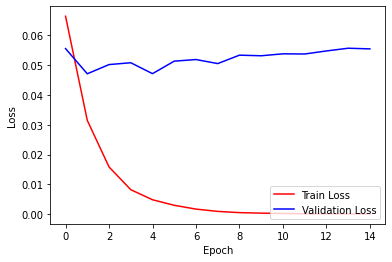

In [52]:
plt.plot(epoch_list, train_loss_list, 'r', label='Train Loss')
plt.plot(epoch_list, val_loss_list, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
# plt.show()
plt.savefig(f'./lab1-2_submissions/exp{exp_num}_sch_bn_loss_graph.png')

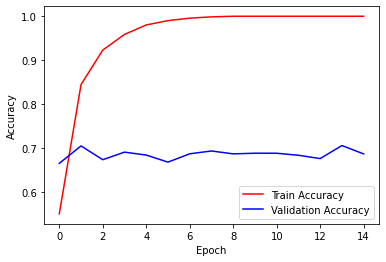

In [53]:
plt.plot(epoch_list, train_acc_list, 'r', label='Train Accuracy')
plt.plot(epoch_list, val_acc_list, 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.savefig(f'./lab1-2_submissions/exp{exp_num}_acc_graph.png')

### Test

In [54]:
test_model = MyModel(input_size, num_hid1, num_hid2).to(device)
PATH = f'./lab1-2_parameters/model_{exp_num}.pth'
print(PATH)
test_model.load_state_dict(torch.load(PATH))

./lab1-2_parameters/model_16.pth


<All keys matched successfully>

In [55]:
test_y = test_model(test_x.to(device)).argmax(dim=1)
print(test_y.shape)

torch.Size([100])


In [56]:
print(test_y)

tensor([14, 14, 14, 14, 14, 14,  7,  7, 10,  7, 14, 14,  9, 17,  7, 14, 14,  9,
        17,  9,  0,  6,  0, 14, 14,  7,  9,  9, 14,  1,  9,  1, 17,  7,  7, 10,
         0,  0,  9,  7, 14,  9,  7,  9, 14,  7,  9, 14, 14, 14,  9,  7,  7,  4,
         9,  2,  2, 14,  7,  7,  7, 17,  9,  0, 14, 14,  0, 14, 14,  7,  9,  0,
         7, 14,  1,  7,  9, 14,  1, 14,  9,  0, 14,  0,  0,  0, 14,  7,  7, 17,
        17, 14,  7,  7,  7, 14,  7, 14,  7, 10], device='cuda:0')


In [57]:
submission = ['id,pred\n']

f2 = './lab1-2_data/submission_example.csv'

In [58]:
with open(f2, 'rb') as f:
    file = f.read().decode('utf-8')
    content = file.split('\n')[:-1] # 101 (column name included)

    for idx, line in enumerate(content):
        if idx == 0:
            continue
        tmp1 = line.split(',')
        result = dict_category[test_y[idx-1].item()]
        tmp2 = tmp1[0] + ',' + str(result) + '\n'
        submission.append(tmp2)

In [59]:
print(submission)

['id,pred\n', 'S001,D20\n', 'S002,D20\n', 'S003,D20\n', 'S004,D20\n', 'S005,D20\n', 'S006,D20\n', 'S007,D12\n', 'S008,D12\n', 'S009,D16\n', 'S010,D12\n', 'S011,D20\n', 'S012,D20\n', 'S013,D15\n', 'S014,D28\n', 'S015,D12\n', 'S016,D20\n', 'S017,D20\n', 'S018,D15\n', 'S019,D28\n', 'S020,D15\n', 'S021,D1\n', 'S022,D11\n', 'S023,D1\n', 'S024,D20\n', 'S025,D20\n', 'S026,D12\n', 'S027,D15\n', 'S028,D15\n', 'S029,D20\n', 'S030,D3\n', 'S031,D15\n', 'S032,D3\n', 'S033,D28\n', 'S034,D12\n', 'S035,D12\n', 'S036,D16\n', 'S037,D1\n', 'S038,D1\n', 'S039,D15\n', 'S040,D12\n', 'S041,D20\n', 'S042,D15\n', 'S043,D12\n', 'S044,D15\n', 'S045,D20\n', 'S046,D12\n', 'S047,D15\n', 'S048,D20\n', 'S049,D20\n', 'S050,D20\n', 'S051,D15\n', 'S052,D12\n', 'S053,D12\n', 'S054,D6\n', 'S055,D15\n', 'S056,D4\n', 'S057,D4\n', 'S058,D20\n', 'S059,D12\n', 'S060,D12\n', 'S061,D12\n', 'S062,D28\n', 'S063,D15\n', 'S064,D1\n', 'S065,D20\n', 'S066,D20\n', 'S067,D1\n', 'S068,D20\n', 'S069,D20\n', 'S070,D12\n', 'S071,D15\n', 'S0

In [60]:
with open(f'./lab1-2_submissions/lab1-2_submission{exp_num}.csv', 'w') as f:
    f.write(''.join(submission))